# 키움증권 OpenAPI+ 사용 예시

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import logging

logging.basicConfig(
    format='%(asctime)s [%(levelname)s] %(message)s - %(filename)s:%(lineno)d',
    level=logging.DEBUG)

In [3]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## 1. 엔트리포인트 객체 생성

In [4]:
from koapy import KiwoomOpenApiPlusEntrypoint

2021-05-13 23:46:01,155 [INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8. - utils.py:129
2021-05-13 23:46:01,158 [INFO] NumExpr defaulting to 8 threads. - utils.py:141


In [5]:
entrypoint = KiwoomOpenApiPlusEntrypoint()

2021-05-13 23:46:06,458 [DEBUG] Testing if client is ready... - KiwoomOpenApiPlusEntrypoint.py:96
2021-05-13 23:46:06,467 [DEBUG] Client is ready, using existing server - KiwoomOpenApiPlusEntrypoint.py:106


주요한 기능들은 해당 엔트리포인트의 멤버함수로써 제공된다.

예를 들어 아래와 같이 서버 접속 이전에도 실행 가능한 아래 함수를 활용하면 OpenAPI 가 정상적으로 로드되었는지 간접적으로 확인 가능하다.

In [6]:
module_path = entrypoint.GetAPIModulePath()

In [7]:
module_path

'C:\\OpenAPI'

## 2. 서버 접속

In [8]:
entrypoint.EnsureConnected()

0

자동 로그인 설정이 되어있는 경우 로그인이 자동으로 처리되며, 그렇지 않은 경우에는 수동으로 아이디, 비밀번호 등 로그인 정보를 입력해 처리해주어야 한다.

만약에 함수 인자로 `credential` 정보를 주는 경우 [`pywinauto`](https://github.com/pywinauto/pywinauto) 를 활용하여 자동으로 로그인 처리를 진행한다.
앞서 언급한 키움증권에서 기본으로 제공하는 자동 로그인이 아니라 기존에 수동으로 처리하던 과정을 매크로 형태로 자동으로 처리하는 방식이다.
참고로 [`pywinauto`](https://github.com/pywinauto/pywinauto) 사용을 위해서는 **관리자 권한**이 필요하다.

In [9]:
credential = {
    'user_id': 'id',
    'user_password': 'password',
    'cert_password': 'password',
    'is_simulation': True,
    'account_passwords': {
        '0000000000': '0000',
    }    
}

In [10]:
entrypoint.EnsureConnected(credential)

0

참고로 여기서는 이미 로그인이 되어있는 상황이므로 위의 함수가 추가적인 로그인처리를 진행하지는 않게 된다.

## 3. 기본 함수 실행

다시 한번 기본 함수를 통해 접속상태를 확인해보자. 아래 값이 1 인 경우 정상 접속 상태이다. 접속되어 있지 않은 경우라면 0 을 반환한다.

In [11]:
entrypoint.GetConnectState()

1

이후 예시들에서 사용하기 위해 삼성전자의 코드를 확인한다.

In [12]:
codes = entrypoint.GetCodeListByMarketAsList('0')
names = [entrypoint.GetMasterCodeName(code) for code in codes]

In [13]:
codes_by_name = dict(zip(names, codes))

위에서 `GetCodeListByMarketAsList()` 함수는 기존의 `GetCodeListByMarket()` 함수 호출시 나오는 문자열 형태의 결과를 편의를 위해 리스트 형태로 변환해서 제공한다.

In [14]:
code = samsung_code = codes_by_name['삼성전자']

In [15]:
code

'005930'

## 4. TR 요청 예시

### 상위 함수 사용 예시

몇가지 자주 쓰이는 TR 들에 대해서는 요청 및 결과 이벤트 처리까지 완료해서 결과물만 반환하는 상위함수를 제공하고 있다.

In [16]:
info = entrypoint.GetStockBasicInfoAsDict(code) # opt10001

In [17]:
info

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.16',
 '연중최고': '+96800',
 '연중최저': '-78400',
 '시가총액': '4686279',
 '시가총액비중': '',
 '외인소진률': '+53.91',
 '대용가': '64000',
 'PER': '20.44',
 'EPS': '3841',
 'ROE': '10.0',
 'PBR': '1.99',
 'EV': '5.49',
 'BPS': '39406',
 '매출액': '2368070',
 '영업이익': '359939',
 '당기순이익': '264078',
 '250최고': '+96800',
 '250최저': '-47200',
 '시가': '-78900',
 '고가': '-79600',
 '저가': '-78400',
 '상한가': '+104000',
 '하한가': '-56000',
 '기준가': '80000',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20210111',
 '250최고가대비율': '-18.90',
 '250최저가일': '20200513',
 '250최저가대비율': '+66.31',
 '현재가': '-78500',
 '대비기호': '5',
 '전일대비': '-1500',
 '등락율': '-1.88',
 '거래량': '31490096',
 '거래대비': '-87.93',
 '액면가단위': '원',
 '유통주식': '4706743',
 '유통비율': '78.8'}

In [18]:
data = entrypoint.GetDailyStockDataAsDataFrame(code) # opt10081

2021-05-13 23:46:07,968 [DEBUG] Received 600 records from 2021-05-13 00:00:00 to 2018-12-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:46:08,342 [DEBUG] Received 600 records from 2018-12-05 00:00:00 to 2016-06-27 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:46:08,755 [DEBUG] Received 600 records from 2016-06-24 00:00:00 to 2014-01-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:46:09,147 [DEBUG] Received 600 records from 2014-01-15 00:00:00 to 2011-08-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:47:37,942 [DEBUG] Received 600 records from 2011-08-12 00:00:00 to 2009-03-26 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:47:55,994 [DEBUG] Received 600 records from 2009-03-25 00:00:00 to 2006-10-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [19]:
data

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,005930,78500,31490096,2482903,20210513,78900,79600,78400,,,,,,,
1,,80000,35812268,2876602,20210512,80800,81200,79800,,,,,,,
2,,81200,28996680,2365998,20210511,82500,82600,81100,,,,,,,
3,,83200,19385027,1603729,20210510,82300,83500,81800,,,,,,,
4,,81900,14154882,1158685,20210507,81800,82100,81500,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9617,,8010,4970,1,19850109,8240,8240,7950,,,,,,,
9618,,8300,12930,4,19850108,8400,8400,8300,,,,,,,
9619,,8410,11810,3,19850107,8400,8500,8390,,,,,,,
9620,,8390,1660,0,19850105,8400,8440,8390,,,,,,,


데이터가 최대한 있는 그대로 (주로 문자열 형태로) 반환되기 때문에 필요하다면 타입 변환을 거쳐 사용한다.

In [20]:
dates = pd.to_datetime(data['일자'], format='%Y%m%d')
closes = pd.to_numeric(data['현재가'])

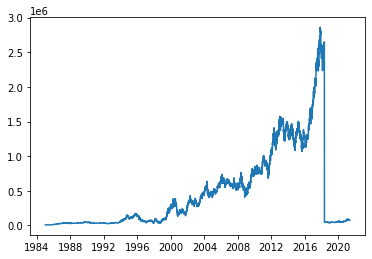

In [21]:
plt.plot(dates, closes)

주가 데이터에서 수정주가가 필요한 경우에는 `adjusted_price=True` 파라미터를 설정해 호출한다.

In [22]:
data_adjusted = entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2021-05-13 23:48:50,289 [DEBUG] Received 600 records from 2021-05-13 00:00:00 to 2018-12-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:48:50,887 [DEBUG] Received 600 records from 2018-12-05 00:00:00 to 2016-06-27 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:49:07,971 [DEBUG] Received 600 records from 2016-06-24 00:00:00 to 2014-01-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:49:08,337 [DEBUG] Received 600 records from 2014-01-15 00:00:00 to 2011-08-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:49:08,854 [DEBUG] Received 600 records from 2011-08-12 00:00:00 to 2009-03-26 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:599
2021-05-13 23:49:09,220 [DEBUG] Received 600 records from 2009-03-25 00:00:00 to 2006-10-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [23]:
dates = pd.to_datetime(data_adjusted['일자'], format='%Y%m%d')
closes = pd.to_numeric(data_adjusted['현재가'])

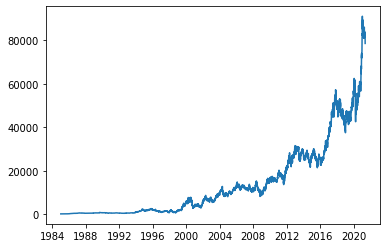

In [24]:
plt.plot(dates, closes)

### 하위 함수 사용 예시

만약에 필요한 TR 에 대한 편의함수가 제공되지 않는 경우라면 아래처럼 직접 TR 요청에 필요한 입력값을 설정해 요청하고, 이후 스트림 형태로 들어오는 이벤트 또한 직접 처리해주는 방식으로 사용할 수 있다.

In [25]:
rqname = '주식기본정보요청'
trcode = 'opt10001'
screen_no = '0001' # 화면번호, 0000 을 제외한 4자리 숫자 임의로 지정
inputs = {'종목코드': code}

In [26]:
output = {}

In [27]:
logging.info('Requesting data for request name: %s', rqname)
for event in entrypoint.TransactionCall(rqname, trcode, screen_no, inputs):
    logging.info('Got event for request: %s', rqname)
    names = event.single_data.names
    values = event.single_data.values
    for name, value in zip(names, values):
        output[name] = value

2021-05-13 23:50:57,083 [INFO] Requesting data for request name: 주식기본정보요청 - <ipython-input-27-84e17a5232d0>:1
2021-05-13 23:51:13,550 [INFO] Got event for request: 주식기본정보요청 - <ipython-input-27-84e17a5232d0>:3


In [28]:
output

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.16',
 '연중최고': '+96800',
 '연중최저': '-78400',
 '시가총액': '4686279',
 '시가총액비중': '',
 '외인소진률': '+53.91',
 '대용가': '64000',
 'PER': '20.44',
 'EPS': '3841',
 'ROE': '10.0',
 'PBR': '1.99',
 'EV': '5.49',
 'BPS': '39406',
 '매출액': '2368070',
 '영업이익': '359939',
 '당기순이익': '264078',
 '250최고': '+96800',
 '250최저': '-47200',
 '시가': '-78900',
 '고가': '-79600',
 '저가': '-78400',
 '상한가': '+104000',
 '하한가': '-56000',
 '기준가': '80000',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20210111',
 '250최고가대비율': '-18.90',
 '250최저가일': '20200513',
 '250최저가대비율': '+66.31',
 '현재가': '-78500',
 '대비기호': '5',
 '전일대비': '-1500',
 '등락율': '-1.88',
 '거래량': '31490096',
 '거래대비': '-87.93',
 '액면가단위': '원',
 '유통주식': '4706743',
 '유통비율': '78.8'}

위의 코드에서 `TransactionCall()` 함수의 경우 반환되는 스트림의 `event` 객체는 `ListenResponse` 타입의 gRPC 메시지 형태로 반환된다.

In [29]:
from pprint import PrettyPrinter
from google.protobuf.json_format import MessageToDict

pp = PrettyPrinter()

def pprint_event(event):
    pp.pprint(MessageToDict(event, preserving_proto_field_name=True))

In [30]:
pprint_event(event)

{'arguments': [{'string_value': '0001'},
               {'string_value': '주식기본정보요청'},
               {'string_value': 'opt10001'},
               {'string_value': ''},
               {'string_value': '0'}],
 'name': 'OnReceiveTrData',
 'single_data': {'names': ['종목코드',
                           '종목명',
                           '결산월',
                           '액면가',
                           '자본금',
                           '상장주식',
                           '신용비율',
                           '연중최고',
                           '연중최저',
                           '시가총액',
                           '시가총액비중',
                           '외인소진률',
                           '대용가',
                           'PER',
                           'EPS',
                           'ROE',
                           'PBR',
                           'EV',
                           'BPS',
                           '매출액',
                           '영업이익',
                           '당기순이익',
    

해당 메시지의 형태는 [`koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto`](https://github.com/elbakramer/koapy/blob/master/koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto) 파일의 내용, 구체적으로 아래와 같은 메시지의 정의 부분을 참고하기 바란다.

```proto
message SingleData {
  repeated string names = 1;
  repeated string values = 2;
}

message RepeatedString {
  repeated string values = 1;
}

message MultiData {
  repeated string names = 1;
  repeated RepeatedString values = 2;
}

message ListenResponse {
  string name = 1;
  repeated Argument arguments = 2;
  SingleData single_data = 3;
  MultiData multi_data = 4;
}
```

각 TR 에 따라 싱글데이터/멀티데이터가 선택적으로 설정되어 반환되는데, 그러한 입력/출력과 관련된 정보들은 [KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램을 활용하거나 아니면 아래처럼 `KiwoomOpenApiPlusTrInfo` 를 통해 확인할 수 있다.

In [31]:
from koapy import KiwoomOpenApiPlusTrInfo

In [32]:
tr_info = KiwoomOpenApiPlusTrInfo.get_trinfo_by_code('opt10001')

In [33]:
tr_info.inputs

[KiwoomOpenApiPlusTrInfo.Field('종목코드', 0, 6, 9001)]

In [34]:
tr_info.single_outputs

[KiwoomOpenApiPlusTrInfo.Field('종목코드', 0, 20, 389),
 KiwoomOpenApiPlusTrInfo.Field('종목명', 20, 50, 302),
 KiwoomOpenApiPlusTrInfo.Field('결산월', 40, 20, 315),
 KiwoomOpenApiPlusTrInfo.Field('액면가', 60, 20, 310),
 KiwoomOpenApiPlusTrInfo.Field('자본금', 80, 20, 309),
 KiwoomOpenApiPlusTrInfo.Field('상장주식', 100, 20, 312),
 KiwoomOpenApiPlusTrInfo.Field('신용비율', 120, 20, 329),
 KiwoomOpenApiPlusTrInfo.Field('연중최고', 140, 20, 1006),
 KiwoomOpenApiPlusTrInfo.Field('연중최저', 160, 20, 1009),
 KiwoomOpenApiPlusTrInfo.Field('시가총액', 180, 20, 311),
 KiwoomOpenApiPlusTrInfo.Field('시가총액비중', 200, 20, 336),
 KiwoomOpenApiPlusTrInfo.Field('외인소진률', 220, 20, 314),
 KiwoomOpenApiPlusTrInfo.Field('대용가', 240, 20, 308),
 KiwoomOpenApiPlusTrInfo.Field('PER', 260, 20, 1600),
 KiwoomOpenApiPlusTrInfo.Field('EPS', 280, 20, 1604),
 KiwoomOpenApiPlusTrInfo.Field('ROE', 300, 20, 1630),
 KiwoomOpenApiPlusTrInfo.Field('PBR', 320, 20, 1601),
 KiwoomOpenApiPlusTrInfo.Field('EV', 340, 20, 1608),
 KiwoomOpenApiPlusTrInfo.Field('BPS

In [35]:
tr_info.multi_outputs

[]

## 5. 조건검색 예시

조건검색을 사용하기 위해서는 먼저 서버에 저장된 조건들을 불러와야 한다.

In [36]:
entrypoint.EnsureConditionLoaded()

1

불러온 조건들의 목록은 아래 함수로 확인이 가능하다.

In [37]:
conditions = entrypoint.GetConditionNameListAsList()

In [38]:
conditions

[(0, '대형 저평가 우량주'), (1, '중소형 저평가주')]

이후 예시의 정상동작을 위해서는 아래에서 사용되는 조건들과 같은 이름을 가지는 조건들이 미리 저장되어 있어야 한다.

- 대형 저평가 우량주
- 중소형 저평가주

위의 조건식들은 키움에서 예시로 제공하는 추천식들을 그대로 이름을 똑같이 해서 저장한 것들이다.
참고로 조건들을 편집하고 저장하는건 영웅문 HTS 내부에서만 가능하기 때문에 따로 HTS 를 열어 편집해주어야 한다.

조건식이 편집된 이후에 해당 조건식을 기존에 동작중인 OpenAPI 에도 갱신하고 싶은 경우, 아래 함수를 통해 편집된 조건식을 새로 불러온다.

In [39]:
entrypoint.LoadCondition()

1

### 일반 조건검색 예시

In [40]:
condition_name = '대형 저평가 우량주'

In [41]:
codes, info = entrypoint.GetCodeListByCondition(condition_name, with_info=True)

위의 함수에서 `with_info=True` 로 호출하게 되면 조건을 만족하는 코드 목록 (`codes`) 뿐만 아니라 해당 종목들에 대한 기본정보들도 (`info`) 같이 가져와 DataFrame 형태로 제공한다.

In [42]:
info

,종목코드,종목명,현재가,기준가,전일대비,전일대비기호,등락율,거래량,거래대금,체결량,...,ELW만기일,미결제약정,미결제전일대비,이론가,내재변동성,델타,감마,쎄타,베가,로
0,000240,한국앤컴퍼니,-18650,19050,-400,5,-2.10,209278,3937,-3,...,00000000,,,,,,,,,
1,001630,종근당홀딩스,+110500,110000,+500,2,+0.45,16107,1759,+3,...,00000000,,,,,,,,,
2,001800,오리온홀딩스,+17900,17800,+100,2,+0.56,498369,8919,-1,...,00000000,,,,,,,,,
3,001880,DL건설,-35600,36450,-850,5,-2.33,115738,4128,-9,...,00000000,,,,,,,,,
4,003230,삼양식품,+97500,95100,+2400,2,+2.52,140072,13480,+1,...,00000000,,,,,,,,,
5,003800,에이스침대,+46000,42650,+3350,2,+7.85,17107,762,+3,...,00000000,,,,,,,,,
6,004000,롯데정밀화학,-60800,61500,-700,5,-1.14,265348,16250,+69,...,00000000,,,,,,,,,
7,006040,동원산업,-303000,303500,-500,5,-0.16,8320,2532,-1,...,00000000,,,,,,,,,
8,006390,한일현대시멘트,-41750,42400,-650,5,-1.53,45490,1911,-3,...,00000000,,,,,,,,,
9,006650,대한유화,-267500,276500,-9000,5,-3.25,87900,23776,+1,...,00000000,,,,,,,,,


### 실시간 조건검색 예시

같은 조건식은 1분에 1건 제한이므로 예시 실행시 제한을 회피하기 위해서 새로 설정한다.

In [43]:
condition_name = '중소형 저평가주'

In [44]:
logging.info('Start listening realtime condition stream...')
stream = entrypoint.GetCodeListByConditionAsStream(condition_name)

2021-05-13 23:51:14,292 [INFO] Start listening realtime condition stream... - <ipython-input-44-f04b6a919f1c>:1


실시간 조건검색의 경우 조건에 만족/불만족하는 종목이 편입/이탈할때마다 계속해서 이벤트를 반환한다. 예시에서는 10초 동안만 이벤트를 확인해본다.

In [45]:
import threading

def stop_listening():
    logging.info('Stop listening realtime condition events...')
    stream.cancel()
    
threading.Timer(10.0, stop_listening).start() # 10초 이후에 gRPC 커넥션 종료하도록 설정

In [46]:
import grpc

try:
    for event in stream:
        pprint_event(event)
except grpc.RpcError as e:
    pass

{'arguments': [{'string_value': '2372'},
               {'string_value': '900290;900340;002170;036190;037710;042420;046940;083550;084650;225220;248170;352700;950190;'},
               {'string_value': '중소형 저평가주'},
               {'long_value': '1'},
               {'long_value': '0'}],
 'name': 'OnReceiveTrCondition'}


2021-05-13 23:51:24,321 [INFO] Stop listening realtime condition events... - <ipython-input-45-c769dc00f6f7>:4


위에서 `stream` 결과는 [`grpc`](https://grpc.github.io/grpc/python/) 의 [`_MultiThreadedRendezvous`](https://github.com/grpc/grpc/blob/53ba4a101e80e1a67d4ec741b7e1aad6ea8d790f/src/python/grpcio/grpc/_channel.py#L652) 객체인데 사실 해당 타입은 직접적으로 외부에 노출되는 타입은 아님. 대신에 해당 타입은 내부적으로 [`grpc.RpcError`](https://grpc.github.io/grpc/python/grpc.html?highlight=rpcerror#grpc.RpcError), [`grpc.RpcContext`](https://grpc.github.io/grpc/python/grpc.html?highlight=rpccontext#grpc.RpcContext), [`grpc.Call`](https://grpc.github.io/grpc/python/grpc.html?highlight=call#grpc.Call), [`grpc.Future`]() 인터페이스를 구현하고 있으므로 해당 객체의 사용법과 관련해서는 각각의 인터페이스를 참고하기 바람.

## 6. 주문처리 예시

In [47]:
first_account_no = entrypoint.GetFirstAvailableAccount()

In [48]:
request_name = '삼성전자 1주 시장가 신규 매수' # 사용자 구분명, 구분가능한 임의의 문자열
screen_no = '0001'                           # 화면번호, 0000 을 제외한 4자리 숫자 임의로 지정
account_no = first_account_no                # 계좌번호 10자리, 여기서는 계좌번호 목록에서 첫번째로 발견한 계좌번호로 매수처리
order_type = 1         # 주문유형, 1 : 신규매수
code = samsung_code    # 종목코드, 앞의 삼성전자 종목코드
quantity = 1           # 주문수량, 1주 매수
price = 0              # 주문가격, 시장가 매수는 가격설정 의미없음
quote_type = '03'      # 거래구분, 03 : 시장가
original_order_no = '' # 원주문번호, 주문 정정/취소 등에서 사용

주문유형 및 거래구분 등과 관련된 자세한 정보들은 [KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램에서 확인할 수 있다.

주문처리는 실제 시장이 열려있는 동안에만 테스트해볼 수 있기 때문에, 현재 장이 열려 있는지 먼저 확인하고 해당 경우에 한정해서 테스트를 진행한다.

In [49]:
from pandas import Timestamp
from exchange_calendars import get_calendar

krx_calendar = get_calendar('XKRX')

def is_currently_in_session():
    now = Timestamp.now(tz=krx_calendar.tz)
    previous_open = krx_calendar.previous_open(now).astimezone(krx_calendar.tz)
    next_close = krx_calendar.next_close(previous_open).astimezone(krx_calendar.tz)
    return previous_open <= now <= next_close

In [50]:
if is_currently_in_session():
    logging.info('Sending order to buy %s, quantity of 1 stock, at market price...', code)
    for event in entrypoint.OrderCall(request_name, screen_no, account_no, order_type, code, quantity, price, quote_type, original_order_no):
        pprint_event(event)
else:
    logging.info('Cannot send an order while market is not open, skipping...')

2021-05-13 23:51:24,641 [INFO] Cannot send an order while market is not open, skipping... - <ipython-input-50-37048f99b24d>:6


주문 이벤트는 기본적으로 주문수량이 모두 소진되기 전까지 이벤트를 듣도록 되어있으며, 다른 이벤트 스트림과 동일하게 `stream.cancel()` 의 형태로 이벤트 스트림을 더이상 듣지 않도록 하는것이 가능하다. 다만 이벤트 스트림을 취소하는 것이 기존 주문까지 취소하는 것은 아니기 때문에 주문취소나 정정등을 위해서는 별도의 취소/정정 주문을 넣어줘야 한다.

여기서 반환되는 이벤트 객체 역시 앞선 TR 예시에서와 동일하게 `ListenResponse` 타입의 gRPC 메시지 형태로 반환된다. 

## 7. 실시간 데이터 처리 예시

In [51]:
from koapy import KiwoomOpenApiPlusRealType

In [52]:
code_list = [code]
fid_list = KiwoomOpenApiPlusRealType.get_fids_by_realtype_name('주식시세')
real_type = '0' # 기존 화면에 추가가 아니라 신규 생성, 1 의 경우 기존 화면번호에 추가

In [53]:
logging.info('Start listening realtime stock data for code: %s', code)
stream = entrypoint.GetRealDataForCodesAsStream(code_list, fid_list, real_type, screen_no=None, infer_fids=True, readable_names=True, fast_parse=False)

2021-05-13 23:51:24,690 [INFO] Start listening realtime stock data for code: 005930 - <ipython-input-53-d908d1a08033>:1


In [54]:
import threading

def stop_listening():
    logging.info('Stop listening realtime events...')
    stream.cancel()
    
threading.Timer(10.0, stop_listening).start() # 10초 이후에 gRPC 커넥션 종료하도록 설정

In [55]:
import grpc

try:
    for i, event in enumerate(stream):
        if i < 10:
            pprint_event(event) # 노트북 출력이 너무 길어질 수 있어 최초 10개만 출력
except grpc.RpcError as e:
    print(e)

2021-05-13 23:51:34,717 [INFO] Stop listening realtime events... - <ipython-input-54-f9a2c4046337>:4


<_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.CANCELLED
	details = "Locally cancelled by application!"
	debug_error_string = "None"
>
